# Solutions 5 - Examples in Data Clustering

## Assignment 1

## Assignment 2

The letters are written in the file `files/Indore.jpg`. First, preprocessing is needed.

In [1]:
using Images

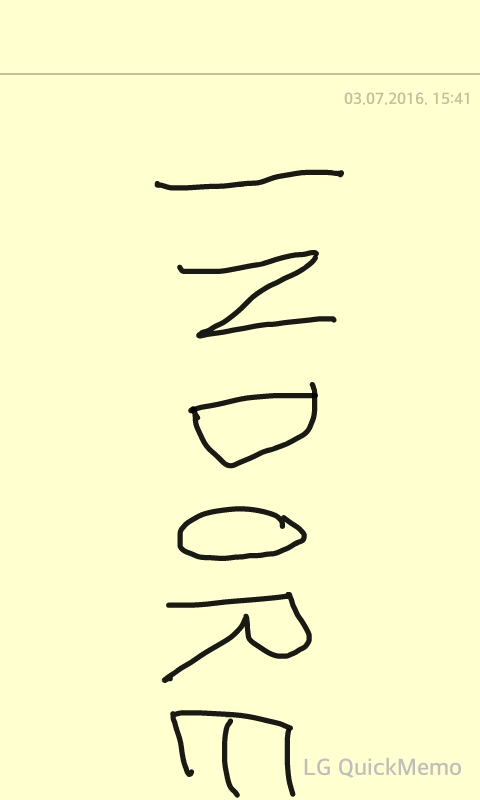

In [2]:
img=load("files/Indore.jpg")

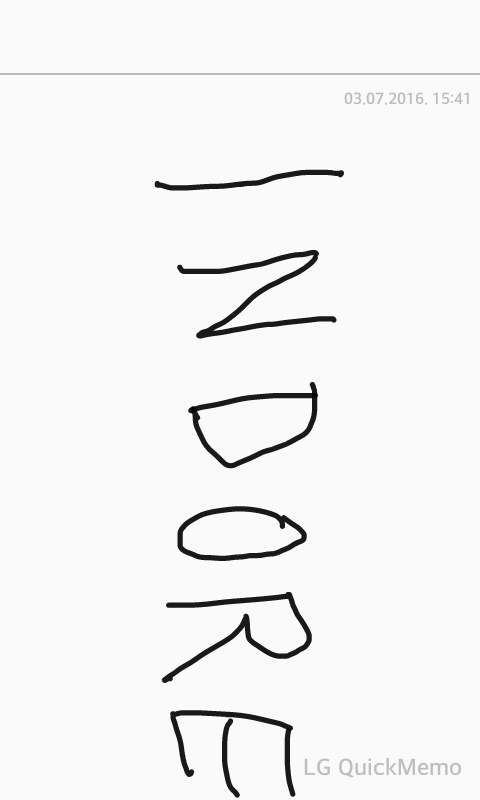

In [3]:
img=map(Gray,img)

In [5]:
# Extract the matrix
A=map(Float64,img)

800×480 Array{Float64,2}:
 0.980392  0.980392  0.980392  0.980392  …  0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392  …  0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392  …  0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 0.980392  0.980392  0.980392  0.980392     0.980392  0.980392  0.980392
 ⋮                       

In [6]:
sort(A[:])

384000-element Array{Float64,1}:
 0.00784313725490196
 0.00784313725490196
 0.00784313725490196
 0.00784313725490196
 0.00784313725490196
 0.00784313725490196
 0.011764705882352941
 0.011764705882352941
 0.011764705882352941
 0.011764705882352941
 0.011764705882352941
 0.011764705882352941
 0.011764705882352941
 ⋮
 0.984313725490196
 0.984313725490196
 0.984313725490196
 0.984313725490196
 0.984313725490196
 0.984313725490196
 0.984313725490196
 0.984313725490196
 0.984313725490196
 0.984313725490196
 0.984313725490196
 0.984313725490196

In [7]:
# Truncate small elements (0 is black, 1 is white)
sum(A.>0.2)

375220

In [8]:
A.*=(A.<=0.2)

800×480 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [9]:
sum(A.>0), prod(size(A))

(8780, 384000)

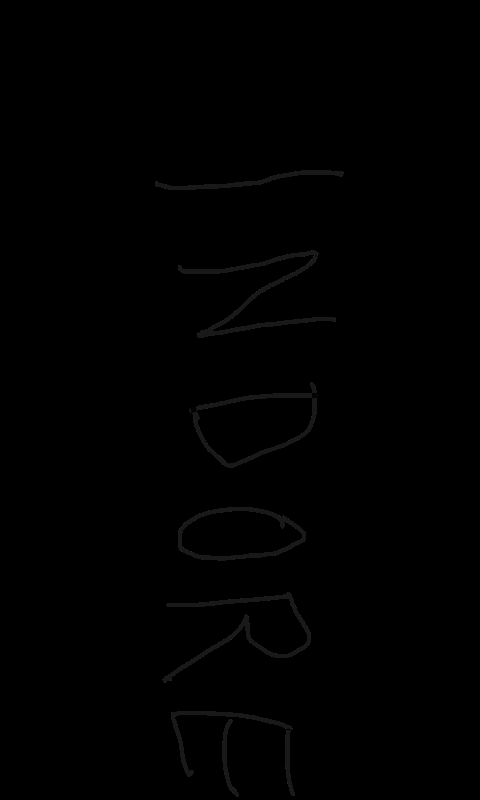

In [10]:
colorview(Gray,A)

In [11]:
# Increase the contrast for clustering
A=ones(size(A)).*map(Float64,A.>0)

800×480 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

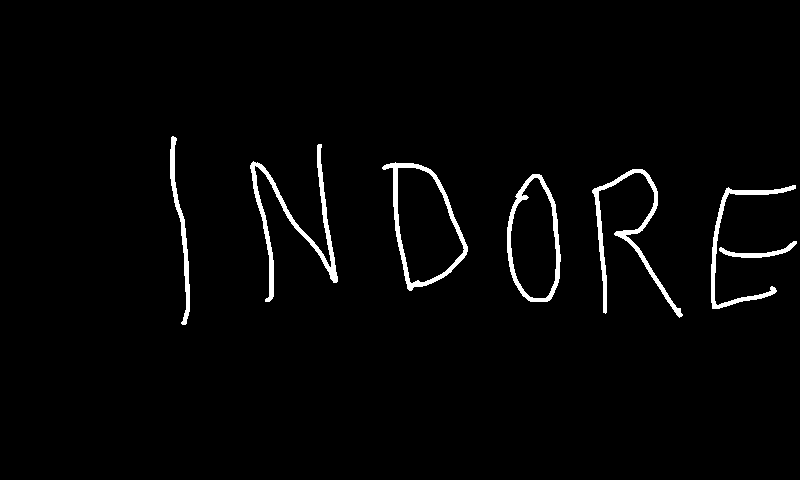

In [12]:
colorview(Gray,rotl90(A))

In [13]:
# Create the data points from letters
X=Array{Int}(undef,2,sum(A.==1))

2×8780 Array{Int64,2}:
 1258238246  -1440300360139603672  0  1262683409  …     881774064  394451780
 4294967296  -9222761792666869560  0           0     201863462912  469684212

In [14]:
ind=findall(A.==1)

8780-element Array{CartesianIndex{2},1}:
 CartesianIndex(183, 156)
 CartesianIndex(184, 156)
 CartesianIndex(185, 156)
 CartesianIndex(186, 156)
 CartesianIndex(182, 157)
 CartesianIndex(183, 157)
 CartesianIndex(184, 157)
 CartesianIndex(185, 157)
 CartesianIndex(186, 157)
 CartesianIndex(187, 157)
 CartesianIndex(182, 158)
 CartesianIndex(183, 158)
 CartesianIndex(184, 158)
 ⋮
 CartesianIndex(173, 342)
 CartesianIndex(174, 342)
 CartesianIndex(175, 342)
 CartesianIndex(176, 342)
 CartesianIndex(177, 342)
 CartesianIndex(172, 343)
 CartesianIndex(173, 343)
 CartesianIndex(174, 343)
 CartesianIndex(175, 343)
 CartesianIndex(176, 343)
 CartesianIndex(173, 344)
 CartesianIndex(174, 344)

In [15]:
ind=findall(A.==1)
for i=1:length(ind)
    X[:,i]=[ind[i][1],ind[i][2]]
end
X=map(Float64,X)

2×8780 Array{Float64,2}:
 183.0  184.0  185.0  186.0  182.0  …  174.0  175.0  176.0  173.0  174.0
 156.0  156.0  156.0  156.0  157.0     343.0  343.0  343.0  344.0  344.0

In [15]:
# import Pkg; Pkg.add("Clustering")

In [16]:
# Solve it
using Clustering

In [17]:
# We are looking for 6 letters
out=kmeans(X,6)

KmeansResult{Array{Float64,2},Float64,Int64}([181.2705479452055 627.6658307210031 … 295.1080797481637 740.7403174603174; 251.47716894977168 245.85830721003134 … 257.8551941238195 231.23492063492063], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [9118.880795073055, 9123.33969918266, 9129.798603292234, 9138.257507401839, 8926.467553063936, 8928.926457173511, 8933.385361283115, 8939.84426539269, 8948.303169502295, 8958.76207361187  …  8233.702712881292, 8222.161616990867, 8212.62052110047, 8462.371662652964, 8444.830566762568, 8429.289470872143, 8415.748374981747, 8404.207279091323, 8628.876228863024, 8613.3351329726], [876, 1595, 1320, 1508, 1906, 1575], [876, 1595, 1320, 1508, 1906, 1575], 2.061467190096685e7, 12, true)

For plotting we use the function from the notebook
[K-means Algorithm](L09+K-means+Algorithm.ipynb).

In [18]:
function plotKmeansresult(out::KmeansResult,X::Array)
    k=size(out.centers,2)
    # Clusters
    scatter(X[1,findall(out.assignments.==1)],X[2,findall(out.assignments.==1)])
    for j=2:k
        scatter!(X[1,findall(out.assignments.==j)],
            X[2,findall(out.assignments.==j)],markersize=1)
    end
    # Centers
    scatter!(out.centers[1,:],out.centers[2,:],markercolor=:black)
end

plotKmeansresult (generic function with 1 method)

In [19]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


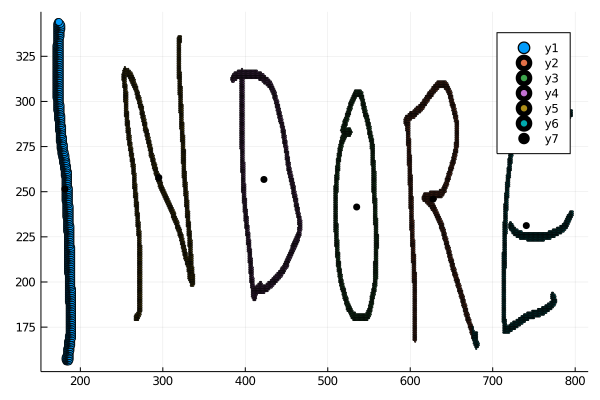

In [20]:
plotKmeansresult(out,X)

Now we try the spectral $k$-partitioning. We:

* form the Laplacian matrix, 
* compute eigenvectors corresponding to $k$ smallest eigenvalues, and
* cluster those vectors with $k$-means algorithm.

In [21]:
# We need some functions from previous notebooks
using SparseArrays
using LinearAlgebra
function my_weight_matrix(src::Array,dst::Array,weights::Array)
    n=nv(G)
    sparse([src;dst],[dst;src],[weights;weights],n,n)
end

my_laplacian(W::AbstractMatrix)=spdiagm(0=>vec(sum(W,dims=2)))-W

function my_normalized_laplacian(L::AbstractMatrix)
    D=1.0./sqrt.(diag(L))
    n=length(D)
    [L[i,j]*(D[i]*D[j]) for i=1:n, j=1:n]
end

my_normalized_laplacian (generic function with 1 method)

In [22]:
function plotKpartresult(C::Vector,X::Array)
    k=maximum(C)
    # Clusters
    scatter(X[1,findall(C.==1)],X[2,findall(C.==1)])
    for j=2:k
        scatter!(X[1,findall(C.==j)],X[2,findall(C.==j)])
    end
    scatter!()
end

plotKpartresult (generic function with 1 method)

In [26]:
# import Pkg; Pkg.add("Distances")

In [23]:
using Distances
S=pairwise(SqEuclidean(),X,dims=2)
# S=pairwise(Cityblock(),X)
β=1

1

In [24]:
# Weight matrix
W=exp.(-β*S)
# Sum of weights
D=vec(sum(W,dims=2))
# Laplacian matrix
L=my_laplacian(W)
# Normalized Laplacian matrix
Ln=my_normalized_laplacian(L)

8780×8780 Array{Float64,2}:
  1.0          -0.297331     -0.0148032    …   0.0           0.0
 -0.297331      1.0          -0.25568          0.0           0.0
 -0.0148032    -0.25568       1.0              0.0           0.0
 -0.000115989  -0.0148029    -0.297324         0.0           0.0
 -0.128317     -0.00549362   -3.70157e-5       0.0           0.0
 -0.256394     -0.0811091    -0.00403818   …   0.0           0.0
 -0.0904931    -0.211528     -0.0778166        0.0           0.0
 -0.00450498   -0.0778096    -0.211508         0.0           0.0
 -3.15852e-5   -0.004031     -0.0809647        0.0           0.0
 -3.89101e-8   -3.66928e-5   -0.00544569       0.0           0.0
 -0.00638751   -0.000273467  -1.8426e-6    …   0.0           0.0
 -0.0127418    -0.00403082   -0.000200683      0.0           0.0
 -0.00447838   -0.0104682    -0.00385103       0.0           0.0
  ⋮                                        ⋱                
  0.0           0.0           0.0             -0.0123539    -0.004

In [25]:
# Normalized Laplacian
using Arpack
k=6
m=size(L,1)
λ,Y=eigs(Ln,nev=k,which=:SM, v0=ones(m))
λ

┌ Info: Precompiling Arpack [7d9fca2a-8960-54d3-9f78-7d1dccf2cb97]
└ @ Base loading.jl:1260


6-element Array{Float64,1}:
 3.528795145448156e-16
 3.9523881718141207e-16
 4.136726803277057e-16
 4.1767897090676253e-16
 4.2395164659199276e-16
 4.2395442320546525e-16

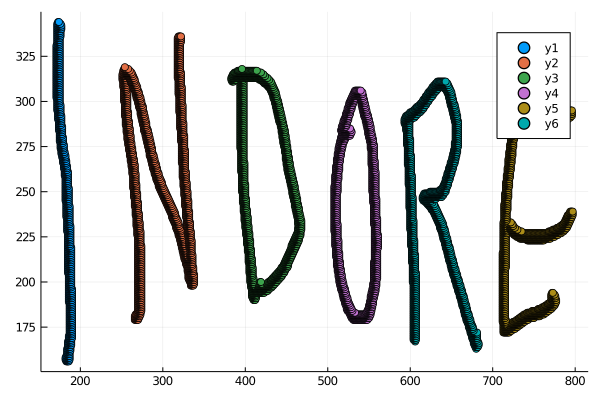

In [26]:
Y=Diagonal(1.0./sqrt.(D))*Y
out=kmeans(Y',k)
plotKpartresult(out.assignments,X)